# Running Results for Ben's Model
Each week I will try out my model (and anyone else's) to see how well they do for a selection of data sets.

This week I will try Australia, Japan, and the US.

In [1]:
import pandas
from plotly import graph_objs as go
from numpy import sqrt

from ben_model import fit, predict

## Australian Data

In [2]:
region_code = 'AU'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")

In [3]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [4]:
params = fit(X, y)

Look at the parameters

In [5]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.747086
beta,0.583479
delta,0.525604
gamma,0.590891
m,117.382126
t0,48.632826


How does it look?

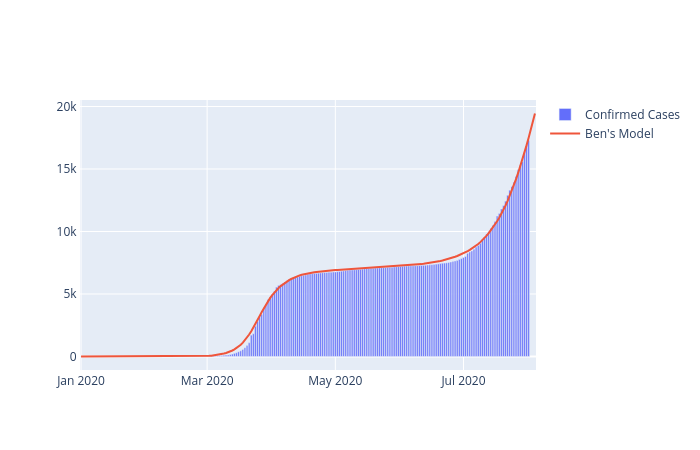

In [6]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.show('png')

In [7]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is ', round(sqrt((diff**2).sum()/len(diff)), 1), ' cases')

RMS Error is  176.2  cases


## Japanese Data

In [8]:
region_code = 'JP'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")

In [9]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [10]:
params = fit(X, y)

Look at the parameters

In [11]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.744489
beta,0.602571
delta,0.495137
gamma,0.605498
m,121.055157
t0,45.849236


How does it look?

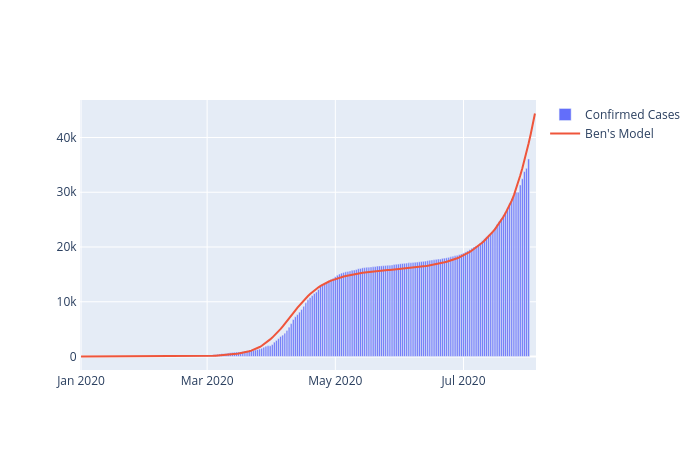

In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.show('png')

What's the RMS error?

In [13]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is ', round(sqrt((diff**2).sum()/len(diff)), 1), ' cases')

RMS Error is  727.1  cases


## US Data

In [14]:
region_code = 'US'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")

In [15]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [16]:
params = fit(X, y)

Look at the parameters

In [17]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.710643
beta,0.601573
delta,0.476811
gamma,0.572553
m,123.792097
t0,12.768245


How does it look?

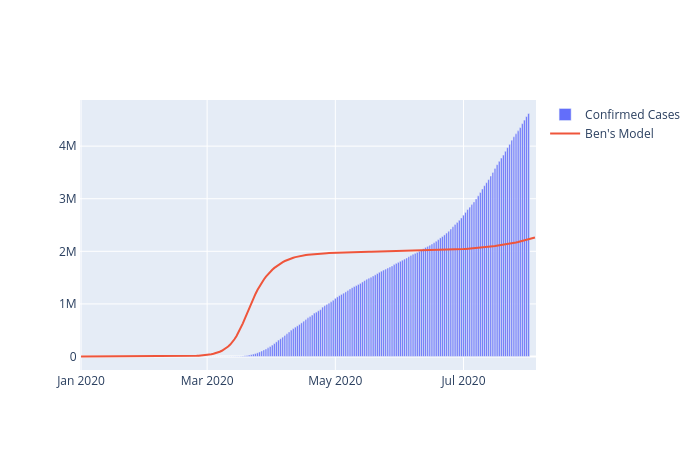

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.show('png')

What's the RMS error?

In [19]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is ', round(sqrt((diff**2).sum()/len(diff)), 1), ' cases')

RMS Error is  862564.9  cases


## US Data up to April

In [20]:
region_code = 'US'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")
data = data[data['date'] < '2020-04-01']

In [21]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [22]:
params = fit(X, y, t0=85)

Look at the parameters

In [23]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.936370
beta,0.603812
delta,0.555035
gamma,0.485962
m,119.844898
t0,59.204941


How does it look?

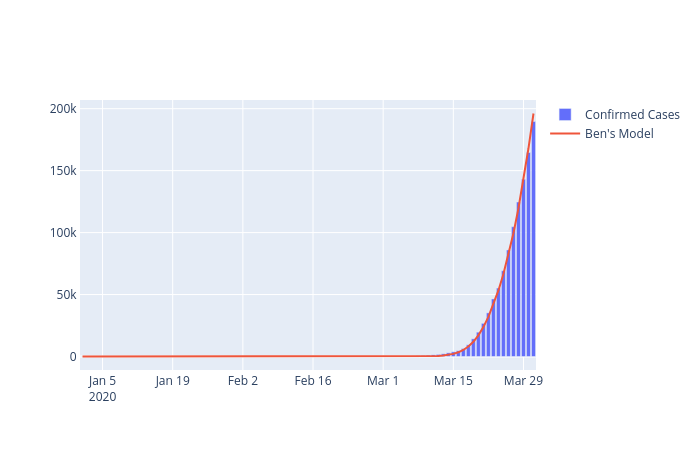

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.show('png')

What's the RMS error?

In [25]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is ', round(sqrt((diff**2).sum()/len(diff)), 1), ' cases')

RMS Error is  1497.6  cases
